In [97]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from scout.niche import randomly_sample
from scout.cyto import profiles_to_features

Load UMAP model and analysis dataframe

In [120]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/d35_vs_d60/'
umap = joblib.load(os.path.join(working_dir, 'model_d35_d60.umap'))
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis

,type
path,
20190419_14_35_07_AA_org1_488LP13_561LP120_642LP60,Lancaster_d35
20190419_15_50_16_AA_org2_488LP13_561LP120_642LP60,Lancaster_d35
20190419_16_09_03_AA_org3_488LP13_561LP120_642LP60,Lancaster_d35
20190430_11_36_09_AA-4.30.19-org1_488LP12p5_561LP120_642LP50,Lancaster_d35
20190430_15_06_10_AA-4.30.19-org3_488LP13_561LP120_642LP50,Lancaster_d35
20190614_14_03_07_AA_ef23-1_488LP14_561LP120_642LP60,Lancaster_d35
20190614_14_48_43_AA_ef23-2_488LP14_561LP120_642LP50,Lancaster_d35
20190614_15_40_09_AA_ef23-3_488LP14_561LP120_642LP50,Lancaster_d35
20190614_17_14_47_AA_ef23-4_488LP14_561LP120_642LP50,Lancaster_d35


Get all profiles and labels

In [125]:
n = 5000

np.random.seed(1)
dfs = []
for org in tqdm(analysis.index, total=len(analysis)):
    folder = analysis['type'].loc[org]
    org_dir = os.path.join(working_dir, folder, org)
    profiles = np.load(os.path.join(org_dir, 'dataset/cyto_profiles.npy'))
#     sample_idx = np.load(os.path.join(org_dir, 'dataset/cyto_sample_index.npy'))
    labels = np.load(os.path.join(org_dir, 'cyto_labels.npy'))
    
    profiles_sample, labels_sample = randomly_sample(n, profiles, labels)
    x = umap.transform(profiles_sample.reshape((len(profiles_sample), -1)))
    df = pd.DataFrame({'x': x[:, 0], 
                       'y': x[:, 1],
                       'label': labels_sample,
                       'organoid': len(x) * [org], 
                       'type': len(x) * [folder]})
    dfs.append(df)
df = pd.concat(dfs)
df['type'].unique()

array(['Lancaster_d35', 'Lancaster_d60'], dtype=object)

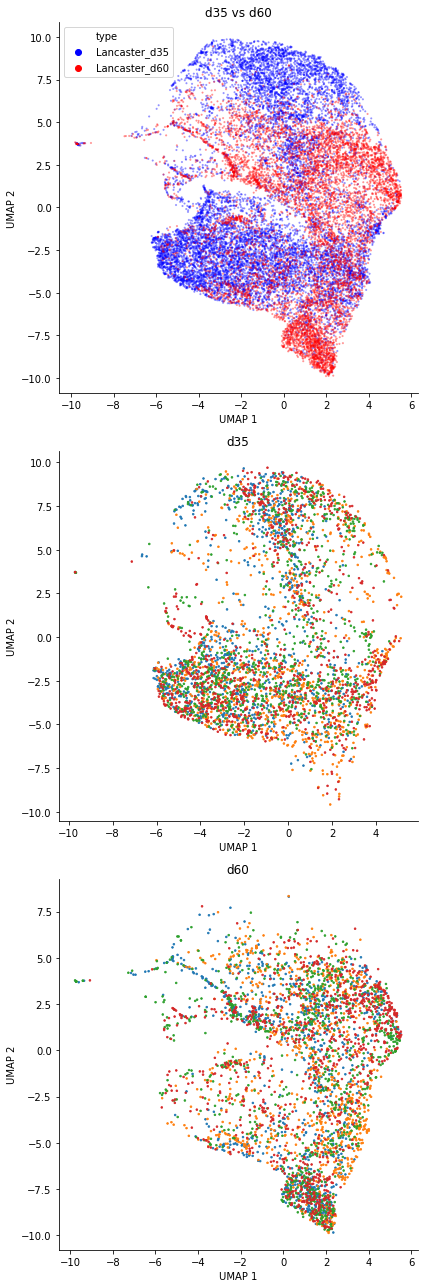

In [96]:
n_orgs = 4

plt.figure(figsize=(6, 18))

plt.subplot(3, 1, 1)
sns.scatterplot(x='x', y='y', hue='type', data=df, edgecolor=None, s=2, alpha=0.3, palette=['b', 'r'])
plt.title('d35 vs d60')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.subplot(3, 1, 2)
sns.scatterplot(x='x', y='y', hue='organoid', data=df.where(df['type'] == 'Lancaster_d35').dropna().iloc[:n_orgs*n], 
                edgecolor=None, s=3, alpha=1, legend=None)
plt.title('d35')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.subplot(3, 1, 3)
sns.scatterplot(x='x', y='y', hue='organoid', data=df.where(df['type'] == 'Lancaster_d60').dropna().iloc[2*n:(n_orgs+2)*n], 
                edgecolor=None, s=3, alpha=1, legend=None)
plt.title('d60')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
sns.despine()
plt.savefig(os.path.join(working_dir, 'umap_d35_vs_d60.pdf'), bbox_inches='tight')
plt.show()

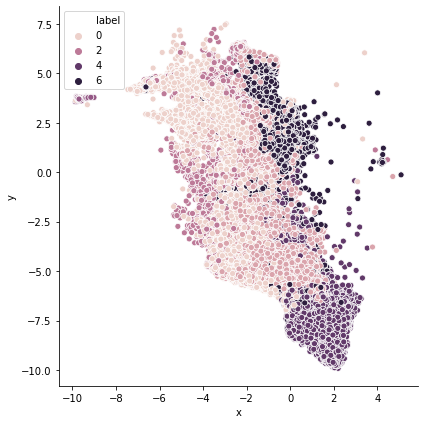

In [126]:
plt.figure(figsize=(6, 6))

sns.scatterplot(x='x', y='y', hue='label', data=df)

plt.tight_layout()
sns.despine()
# plt.savefig(os.path.join(working_dir, 'umap_d35_vs_d60_clusters.pdf'), bbox_inches='tight')
plt.show()

In [117]:
df.where(df['label'] == 0).dropna()

,x,y,label,organoid,type
10,-2.096101,3.482909,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
22,-2.300344,-1.438938,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
39,-2.455948,2.688697,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
52,-6.569766,4.415989,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
55,-2.771957,-0.173336,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
72,-2.368056,1.685185,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
73,-4.525587,2.046459,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
74,-2.094811,3.372573,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
140,-2.461201,3.666057,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
156,-4.349027,1.722329,0.0,20190419_14_35_07_AA_org1_488LP13_561LP120_642...,Lancaster_d35
